In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2
loc = '/content/drive/My Drive/project photos/project'

In [3]:
import os
label = []
for i in os.listdir(loc):
  if(i.split('.')[0]== 'non_defective'):
    label.append(0)
  else:
    label.append(1)

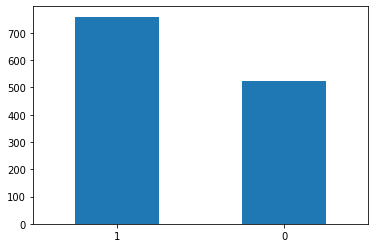

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
label = pd.DataFrame(label)
label[0].value_counts().plot.bar(rot=0)

In [5]:
label.shape

(1283, 1)

In [6]:
from tqdm import tqdm
features = []
for i in tqdm(os.listdir(loc)):
  path = os.path.join(loc,i)
  f = cv2.imread(path)
  fr = cv2.resize(f,(70,70))
  features.append(fr)

100%|██████████| 1283/1283 [20:21<00:00,  1.05it/s]


In [7]:
 import numpy as np
X = np.array(features)
Y = np.array(label)
y = np.array(label)

In [8]:
X.shape

(1283, 70, 70, 3)

In [9]:
Xt = X.reshape(1283,14700)

In [10]:
Xt = Xt/Xt.max()

In [11]:
Xt.shape[1]

14700

In [12]:
import keras
from keras import layers
from keras.utils import to_categorical

In [13]:
model = keras.Sequential()
model.add(layers.Dense(200, activation = 'relu' , input_dim = Xt.shape[1]))
model.add(layers.Dense(100 , activation = 'relu'))
model.add(layers.Dense(2, activation = 'softmax'))

In [14]:
Yt = to_categorical(Y)

In [15]:
Yt

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [16]:
pd.DataFrame(Yt).to_csv('detection_features.csv')

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               2940200   
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 202       
Total params: 2,960,502
Trainable params: 2,960,502
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [19]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(Xt,Yt,test_size=0.25,random_state =1)

In [20]:
xtrain.shape

(962, 14700)

In [21]:
ytrain.shape

(962, 2)

In [22]:
f= model.fit(xtrain,ytrain,epochs=15)

Epoch 1/15
31/31 [==============================] - 1s 16ms/step - loss: 0.8284 - accuracy: 0.5748
Epoch 2/15
31/31 [==============================] - 1s 16ms/step - loss: 0.7114 - accuracy: 0.5509
Epoch 3/15
31/31 [==============================] - 1s 16ms/step - loss: 0.6751 - accuracy: 0.6019
Epoch 4/15
31/31 [==============================] - 1s 16ms/step - loss: 0.6725 - accuracy: 0.5842
Epoch 5/15
31/31 [==============================] - 1s 17ms/step - loss: 0.6848 - accuracy: 0.5884
Epoch 6/15
31/31 [==============================] - 1s 16ms/step - loss: 0.6578 - accuracy: 0.6154
Epoch 7/15
31/31 [==============================] - 1s 17ms/step - loss: 0.6585 - accuracy: 0.6050
Epoch 8/15
31/31 [==============================] - 0s 16ms/step - loss: 0.6454 - accuracy: 0.6320
Epoch 9/15
31/31 [==============================] - 1s 17ms/step - loss: 0.6315 - accuracy: 0.6247
Epoch 10/15
31/31 [==============================] - 0s 16ms/step - loss: 0.6148 - accuracy: 0.6611
Epoch 11/

In [23]:
model.evaluate(xtest,ytest)

11/11 [==============================] - 0s 7ms/step - loss: 0.6786 - accuracy: 0.6044


[0.6786110401153564, 0.604361355304718]

In [24]:
 model.save('detector.h5')

In [25]:
p = ['non_defective','defective']

In [33]:
k = cv2.imread('/test1.jpg')
kt = cv2.resize(k,(70,70))
model.predict(kt.reshape(1,14700))

array([[1., 0.]], dtype=float32)

In [34]:
p[np.argmax(model.predict(kt.reshape(1,14700)))]

'non_defective'

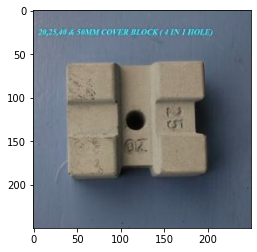

In [35]:
plt.imshow(k)
plt.show()

In [36]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

In [37]:
model1 = Sequential()

model1.add(Conv2D(32, (3, 3), activation='relu', input_shape=(70, 70,3)))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

model1.add(Conv2D(128, (3, 3), activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

model1.add(Flatten())
model1.add(Dense(512, activation='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.5))
model1.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model1.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 68, 68, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 68, 68, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 34, 34, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 34, 34, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)       

In [41]:
 model1.save('detector_CNN.h5')

In [42]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Yt,test_size=0.25,random_state =1)

In [43]:
model1.fit(xtrain,ytrain,epochs=15)

Epoch 1/15
31/31 [==============================] - 11s 370ms/step - loss: 0.8009 - accuracy: 0.7620
Epoch 2/15
31/31 [==============================] - 12s 372ms/step - loss: 0.4487 - accuracy: 0.8545
Epoch 3/15
31/31 [==============================] - 12s 372ms/step - loss: 0.3674 - accuracy: 0.8649
Epoch 4/15
31/31 [==============================] - 12s 378ms/step - loss: 0.2492 - accuracy: 0.9106
Epoch 5/15
31/31 [==============================] - 12s 372ms/step - loss: 0.2377 - accuracy: 0.9210
Epoch 6/15
31/31 [==============================] - 12s 371ms/step - loss: 0.1896 - accuracy: 0.9345
Epoch 7/15
31/31 [==============================] - 12s 372ms/step - loss: 0.1482 - accuracy: 0.9397
Epoch 8/15
31/31 [==============================] - 11s 369ms/step - loss: 0.1180 - accuracy: 0.9615
Epoch 9/15
31/31 [==============================] - 11s 368ms/step - loss: 0.1392 - accuracy: 0.9532
Epoch 10/15
31/31 [==============================] - 11s 370ms/step - loss: 0.1071 - accura

In [44]:
model1.evaluate(xtest,ytest)

11/11 [==============================] - 1s 72ms/step - loss: 1.4239 - accuracy: 0.6199


[1.4238725900650024, 0.6199377179145813]

In [45]:
k = cv2.imread('/defective.27.jpg')
kt = cv2.resize(k,(70,70))
model1.predict(kt.reshape(1,70,70,3))

array([[5.5877248e-05, 9.9994409e-01]], dtype=float32)

In [46]:
p[np.argmax(model1.predict(kt.reshape(1,70,70,3)))]

'defective'

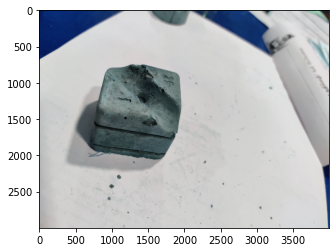

In [47]:
plt.imshow(k)
plt.show()

In [49]:
k1 = cv2.imread('/test1.jpg')
kt1 = cv2.resize(k1,(70,70))
model1.predict(kt1.reshape(1,70,70,3))

array([[0.59265906, 0.40734094]], dtype=float32)

In [50]:
p[np.argmax(model1.predict(kt1.reshape(1,70,70,3)))]

'non_defective'

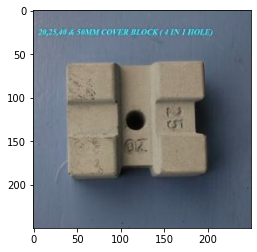

In [51]:
plt.imshow(k1)
plt.show()

[[0.0012109  0.99878913]]
defective


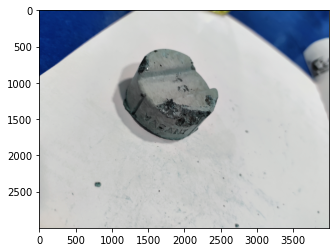

In [63]:
k3 = cv2.imread('/defective.138.jpg')
kt = cv2.resize(k3,(70,70))
print(model1.predict(kt.reshape(1,70,70,3)))
print(p[np.argmax(model1.predict(kt.reshape(1,70,70,3)))])
plt.imshow(k3)
plt.show()

[[2.9491604e-04 9.9970502e-01]]
defective


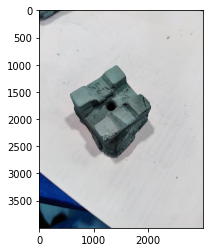

In [72]:
k4 = cv2.imread('/defective.368.jpg')
kt4 = cv2.resize(k4,(70,70))
print(model1.predict(kt4.reshape(1,70,70,3)))
print(p[np.argmax(model1.predict(kt4.reshape(1,70,70,3)))])
plt.imshow(k4)
plt.show()

[[1.4795596e-05 9.9998522e-01]]
defective


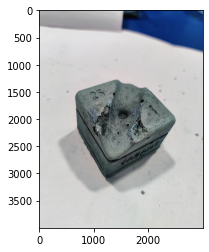

In [68]:
k5 = cv2.imread('/defective.95.jpg')
kt5 = cv2.resize(k5,(70,70))
print(model1.predict(kt5.reshape(1,70,70,3)))
print(p[np.argmax(model1.predict(kt5.reshape(1,70,70,3)))])
plt.imshow(k5)
plt.show()

[[7.3223707e-04 9.9926776e-01]]
defective


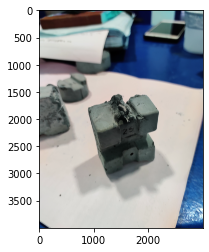

In [67]:
k6 = cv2.imread('/defective.600.jpg')
kt6 = cv2.resize(k6,(70,70))
print(model1.predict(kt6.reshape(1,70,70,3)))
print(p[np.argmax(model1.predict(kt6.reshape(1,70,70,3)))])
plt.imshow(k6)
plt.show()

[[0.97978824 0.02021176]]
non_defective


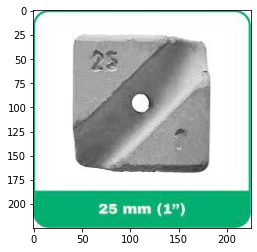

In [79]:
k7 = cv2.imread('/test3.jpg')
kt7 = cv2.resize(k7,(70,70))
print(model1.predict(kt7.reshape(1,70,70,3)))
print(p[np.argmax(model1.predict(kt7.reshape(1,70,70,3)))])
plt.imshow(k7)
plt.show()

[[0.930959   0.06904106]]
non_defective


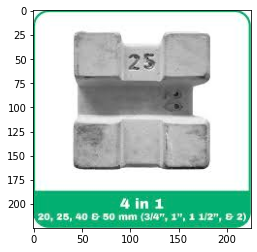

In [74]:
k8 = cv2.imread('/test2.jpg')
kt8 = cv2.resize(k8,(70,70))
print(model1.predict(kt8.reshape(1,70,70,3)))
print(p[np.argmax(model1.predict(kt8.reshape(1,70,70,3)))])
plt.imshow(k8)
plt.show()

[[0.99461937 0.00538061]]
non_defective


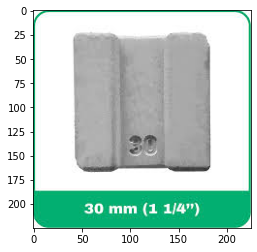

In [82]:
k9 = cv2.imread('/test4.jpg')
kt9 = cv2.resize(k9,(70,70))
print(model1.predict(kt9.reshape(1,70,70,3)))
print(p[np.argmax(model1.predict(kt9.reshape(1,70,70,3)))])
plt.imshow(k9)
plt.show()

[[0.88433766 0.11566225]]
non_defective


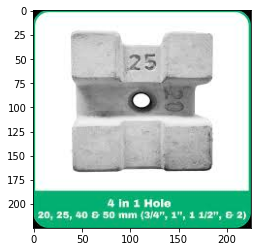

In [94]:
k10 = cv2.imread('/test10.jpg')
kt10 = cv2.resize(k10,(70,70))
print(model1.predict(kt10.reshape(1,70,70,3)))
print(p[np.argmax(model1.predict(kt10.reshape(1,70,70,3)))])
plt.imshow(k10)
plt.show()